In [ ]:
# Danny Ma
# CAP5610
# Graduate
# 10/11/2022
# HW 3

In [119]:
#We are importing all the packages that we need for this project
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
import pandas as pd
import numpy as np
from numpy import reshape
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

In [120]:
##Bring in the dataset
cancer = pd.read_csv('HW3Data_lncRNA_2_cancers.csv')
print(cancer)

            Ensembl_ID  ENSG00000005206.15  ENSG00000083622.8  \
0     TCGA-05-4244-01A            2.979519           0.000000   
1     TCGA-05-4250-01A            1.761075           0.000000   
2     TCGA-05-4382-01A            2.527333           0.000000   
3     TCGA-05-4384-01A            2.300864           0.390990   
4     TCGA-05-4389-01A            2.388600           0.000000   
...                ...                 ...                ...   
1003  TCGA-O2-A52S-01A            3.394331           0.000000   
1004  TCGA-O2-A52V-01A            3.194320           0.000000   
1005  TCGA-O2-A52W-01A            3.601735           0.000000   
1006  TCGA-O2-A5IB-01A            3.999554           0.000000   
1007  TCGA-XC-AA0X-01A            3.201881           0.088547   

      ENSG00000088970.14  ENSG00000099869.7  ENSG00000100181.20  \
0               1.894481           0.000000            0.094936   
1               1.512506           0.000000            0.063790   
2               1.

In [123]:
#We are dropping the Class and Ensembl_ID columns so that our "data" dataframe is clean
cancer.data = cancer.drop('Class', axis = 1)
cancer.data = cancer.data.drop('Ensembl_ID', axis = 1)
cancer.data
#Creating a dataframe that is only a list of our classes
cancer.target = cancer[['Class']]
#We have to make sure we are turning our string values into numbers because that is the only way we can calculate our ROC curve
le=preprocessing.LabelEncoder()
le.fit(cancer.target)
cancer.target = le.transform(cancer.target)
class_names = ['LUAD', 'LUSC']
print(cancer.data)
print(cancer.target)

      ENSG00000005206.15  ENSG00000083622.8  ENSG00000088970.14  \
0               2.979519           0.000000            1.894481   
1               1.761075           0.000000            1.512506   
2               2.527333           0.000000            1.473132   
3               2.300864           0.390990            1.507538   
4               2.388600           0.000000            1.870401   
...                  ...                ...                 ...   
1003            3.394331           0.000000            2.481494   
1004            3.194320           0.000000            2.430929   
1005            3.601735           0.000000            2.115010   
1006            3.999554           0.000000            2.671582   
1007            3.201881           0.088547            1.631340   

      ENSG00000099869.7  ENSG00000100181.20  ENSG00000104691.13  \
0              0.000000            0.094936            1.601225   
1              0.000000            0.063790            2.2605

C:\Users\Danny Ma\AppData\Local\Temp\ipykernel_35596\3292194948.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cancer.data = cancer.drop('Class', axis = 1)
C:\Users\Danny Ma\AppData\Local\Temp\ipykernel_35596\3292194948.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cancer.target = cancer[['Class']]
C:\Users\Danny Ma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Danny Ma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [124]:
#Splitting dataset into training set and test set
#We are doing an 80:20 split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2,random_state=0)

In [174]:
#Creating our svm Classifier
svmclf = svm.SVC(kernel='linear', probability=True)

#Training the model using the training sets
svmclf.fit(X_train, y_train)
svm_y_pred = svmclf.predict(X_test)

#Creating our RandomForest Classifier
rfclf = RandomForestClassifier()

#Training hte model using the training sets
rfclf.fit(X_train, y_train)
rf_y_pred = rfclf.predict(X_test)

In [175]:
#1 is equal to LUSC and 0 is equal to LUAD
Counter(svm_y_pred)

Counter({1: 105, 0: 97})

              precision    recall  f1-score   support

        LUAD       0.98      0.95      0.96       100
        LUSC       0.95      0.98      0.97       102

    accuracy                           0.97       202
   macro avg       0.97      0.97      0.97       202
weighted avg       0.97      0.97      0.97       202



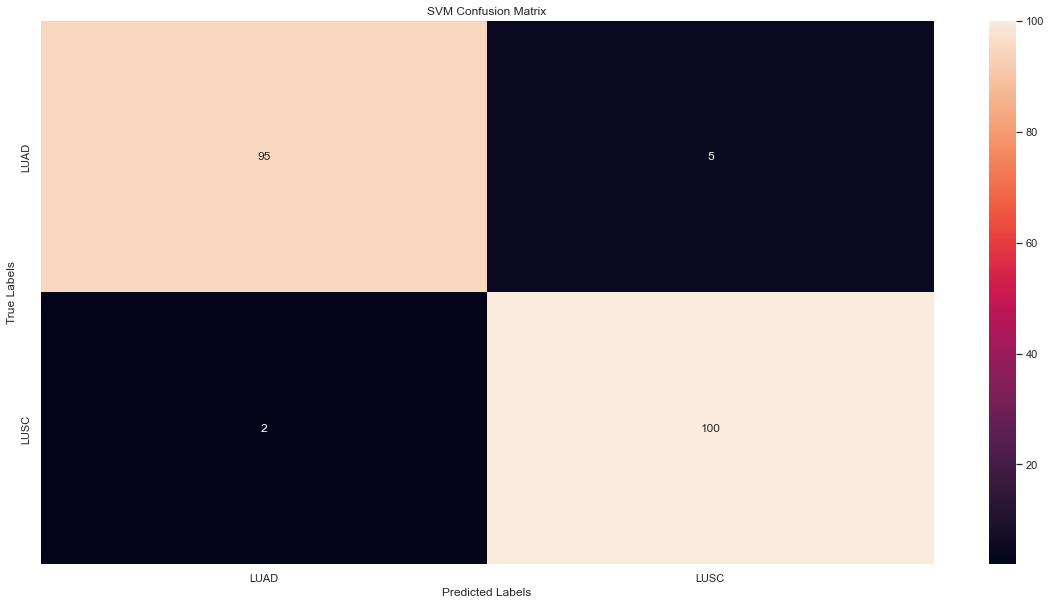

In [176]:
#Creating the classification report for our SVM classifier
print(classification_report(y_test, svm_y_pred, target_names=class_names))

#Creating the confusion matrix for our SVM Classifier
#For this example we are saying that LUAD is Positive and LUSC is negative
#95 is our true positive, 2 is our false positive, 5 is our false negative, and 100 is our true negative
svm_cm = (confusion_matrix(y_test, svm_y_pred))

ax = plt.subplot()
sns.heatmap(svm_cm, annot=True, fmt='g', ax=ax)


sns.set(rc = {'figure.figsize':(20,10)})
#Labeling our confusion matrix
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels');
ax.set_title('SVM Confusion Matrix');
ax.xaxis.set_ticklabels(['LUAD', 'LUSC']);
ax.yaxis.set_ticklabels(['LUAD','LUSC']);

              precision    recall  f1-score   support

        LUAD       0.96      0.97      0.97       100
        LUSC       0.97      0.96      0.97       102

    accuracy                           0.97       202
   macro avg       0.97      0.97      0.97       202
weighted avg       0.97      0.97      0.97       202



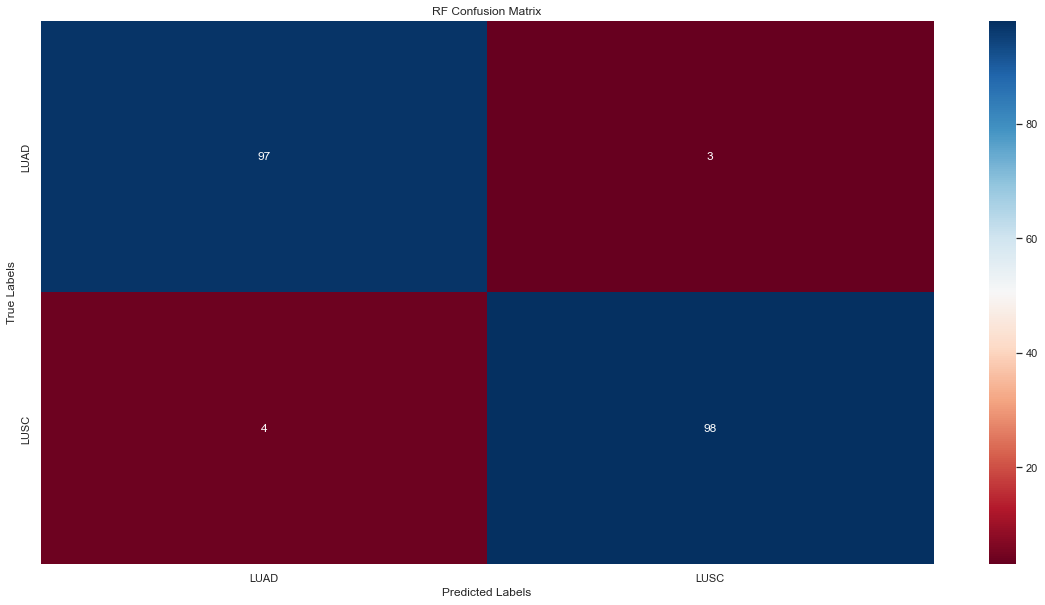

In [177]:
#Creating the classification report for our RF classifier
print(classification_report(y_test, rf_y_pred, target_names=class_names))

#Creating the confusion matrix for our RF Classifier
#For this example we are saying that LUAD is Positive and LUSC is negative
#95 is our true positive, 2 is our false positive, 5 is our false negative, and 100 is our true negative
rf_cm = (confusion_matrix(y_test, rf_y_pred))

ax = plt.subplot()
sns.heatmap(rf_cm, annot=True, fmt='g', ax=ax, cmap = 'RdBu')


sns.set(rc = {'figure.figsize':(20,10)})
#Labeling our confusion matrix
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels');
ax.set_title('RF Confusion Matrix');
ax.xaxis.set_ticklabels(['LUAD', 'LUSC']);
ax.yaxis.set_ticklabels(['LUAD','LUSC']);

SupportVector Roc AUC: 0.9876470588235293
RandomForest Roc AUC: 0.9857843137254902


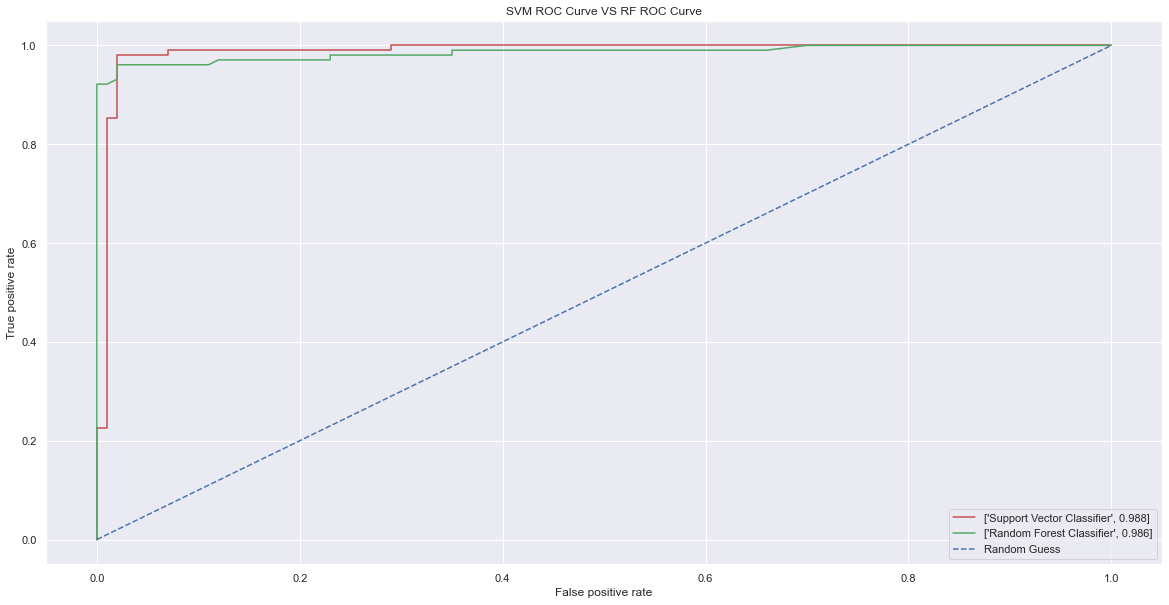

In [182]:
#In this chunk we are creating our graph as well as calculating our ROC Area under the curve
plt.figure()
base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])

svmy_proba = svmclf.predict_proba(X_test)[:,1]
print("SupportVector Roc AUC:", roc_auc_score(y_test, svmclf.predict_proba(X_test)[:,1],average='macro'))
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svmy_proba)
plt.plot(svm_fpr, svm_tpr, 'r', label=['Support Vector Classifier', round(roc_auc_score(y_test, svmclf.predict_proba(X_test)[:,1],average='macro'
                                                                   ),3)])

rfy_proba = rfclf.predict_proba(X_test)[:,1]
print("RandomForest Roc AUC:", roc_auc_score(y_test, rfclf.predict_proba(X_test)[:,1],average='macro'))
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rfy_proba)
plt.plot(rf_fpr, rf_tpr, 'g', label=['Random Forest Classifier', round(roc_auc_score(y_test, rfclf.predict_proba(X_test)[:,1],average='macro'
                                                                   ),3)])
plt.plot(base_fpr, base_tpr, 'b--', label = 'Random Guess')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC Curve VS RF ROC Curve')
plt.legend(loc='lower right')
plt.savefig('1.png')
plt.show()    